In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.ensemble import AdaBoostClassifier
from sklearn.preprocessing import StandardScaler
import numpy as np
from sklearn.model_selection import learning_curve
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)



In [2]:
# Шлях до файлу
file_path = r'D:\\KPI\\7 семестр\\ТМН\\data_banknote_authentication.txt'

# Завантажуємо дані з локального файлу
column_names = ['Variance', 'Skewness', 'Curtosis', 'Entropy', 'Class']
data = pd.read_csv(file_path, header=None, names=column_names)

# Виводимо перші рядки
data.head()

,Variance,Skewness,Curtosis,Entropy,Class
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


In [3]:
# Розділяємо на ознаки (X) і ціль (y)
X = data.drop('Class', axis=1)
y = data['Class']

# Розділяємо дані на тренувальні та тестові вибірки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [4]:
# Створюємо модель логістичної регресії
logistic_model = LogisticRegression()

# Тренуємо модель на тренувальних даних
logistic_model.fit(X_train, y_train)

# Оцінюємо модель на тестовій вибірці
y_pred_logistic = logistic_model.predict(X_test)
accuracy_logistic = accuracy_score(y_test, y_pred_logistic)

print(f'Accuracy (Logistic loss): {accuracy_logistic}')

Accuracy (Logistic loss): 0.9878640776699029


In [5]:
# Створюємо модель Adaboost з логістичною регресією як базовим класифікатором
adaboost_model = AdaBoostClassifier(estimator=LogisticRegression(), n_estimators=50, random_state=42)

# Тренуємо модель
adaboost_model.fit(X_train, y_train)

# Оцінюємо модель на тестовій вибірці
y_pred_adaboost = adaboost_model.predict(X_test)
accuracy_adaboost = accuracy_score(y_test, y_pred_adaboost)

print(f'Accuracy (Adaboost loss): {accuracy_adaboost}')

Accuracy (Adaboost loss): 0.9878640776699029


In [6]:
from sklearn.preprocessing import StandardScaler

# Масштабуємо дані
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

Accuracy: 0.9878640776699029


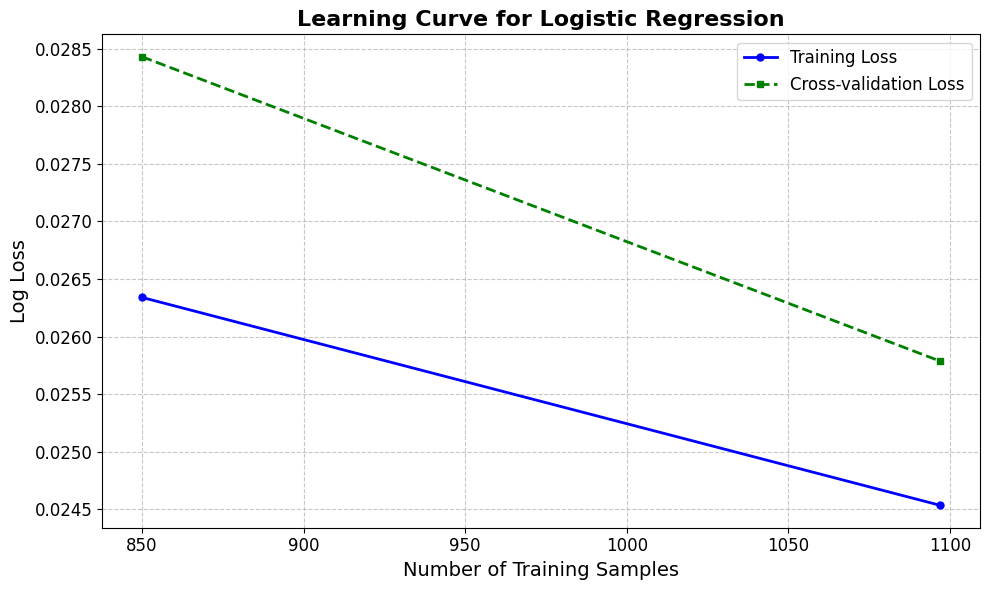

In [7]:
# Ініціалізація моделі логістичної регресії
log_reg = LogisticRegression(solver='lbfgs')
warnings.filterwarnings('ignore')

# Обчислення кривих навчання з використанням крос-валідації (scoring='neg_log_loss')
train_sizes, train_scores, test_scores = learning_curve(log_reg, X, y, scoring='neg_log_loss')

# Середні значення для тренувальних та тестових вибірок
train_mean = np.mean(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)

# Тренування моделі на повній тренувальній вибірці
log_reg.fit(X_train, y_train)
y_pred = log_reg.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)
plt.figure(figsize=(10, 6))  
plt.plot(train_sizes, -train_mean, color='blue', marker='o', linestyle='-', linewidth=2, markersize=5, label='Training Loss')
plt.plot(train_sizes, -test_mean, color='green', marker='s', linestyle='--', linewidth=2, markersize=5, label='Cross-validation Loss')
plt.title('Learning Curve for Logistic Regression', fontsize=16, fontweight='bold')
plt.xlabel('Number of Training Samples', fontsize=14)
plt.ylabel('Log Loss', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(loc='best', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)  # Додаємо сітку для кращої візуалізації
plt.tight_layout()

# Показ графіка
plt.show()

Accuracy: 0.9975728155339806


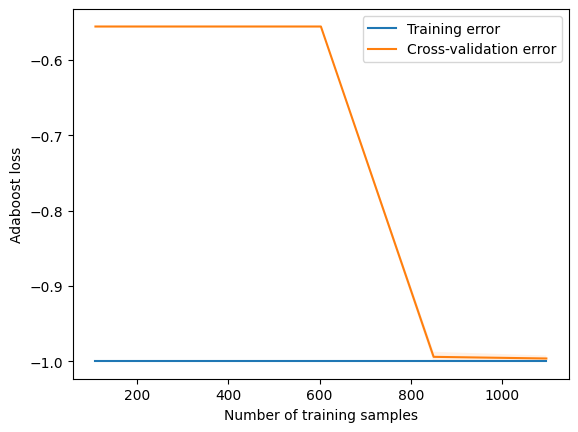

In [8]:
clf = AdaBoostClassifier()

train_sizes, train_scores, test_scores = learning_curve(clf, X, y, cv=5)

train_mean = -train_scores.mean(axis=1)
train_std = train_scores.std(axis=1)
test_mean = -test_scores.mean(axis=1)
test_std = test_scores.std(axis=1)

clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print('Accuracy:', accuracy)

plt.plot(train_sizes, train_mean, label='Training error')
plt.plot(train_sizes, test_mean, label='Cross-validation error')
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.1)
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.1)
plt.xlabel('Number of training samples')
plt.ylabel('Adaboost loss')
plt.legend()
plt.show()

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
Accuracy: 0.9975728155339806


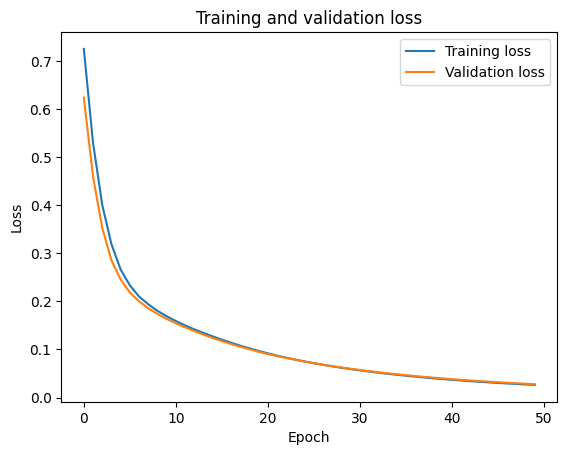

In [9]:
model = Sequential()
model.add(Dense(10, input_dim=X.shape[1], activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer=Adam(learning_rate=0.001))

history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=50, verbose=0)

y_pred = model.predict(X_test)
y_pred = (y_pred > 0.5).astype(int)
accuracy = accuracy_score(y_test, y_pred)

print('Accuracy:', accuracy)

plt.plot(history.history['loss'], label='Training loss')
plt.plot(history.history['val_loss'], label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [11]:
# Точність для логістичної регресії
print(f'Accuracy (Logistic loss): {accuracy_logistic}')

# Точність для AdaBoost
print(f'Accuracy (Adaboost loss): {accuracy_adaboost}')

# Точність для нейронної мережі
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

loss, accuracy_binary_crossentropy = model.evaluate(X_test_scaled, y_test, verbose=0)
print(f'Accuracy (Binary Crossentropy): {accuracy_binary_crossentropy}')

Accuracy (Logistic loss): 0.9878640776699029
Accuracy (Adaboost loss): 0.9878640776699029
Accuracy (Binary Crossentropy): 0.8179611563682556
